In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/amazon-echo-dot-2-reviews-dataset/Amazon Echo 2 Reviews.csv


In [4]:
df=pd.read_csv('/kaggle/input/amazon-echo-dot-2-reviews-dataset/Amazon Echo 2 Reviews.csv')
df

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Pageurl,Title,Review Text,Review Color,User Verified,Review Date,Review Useful Count,Configuration Text,Rating,Declaration Text
0,https://www.amazon.com/All-New-Amazon-Echo-Dot...,Three Stars,Not great speakers,Black,Verified Purchase,10/3/2017,NaN,Echo Dot,3,NaN
1,https://www.amazon.com/All-New-Amazon-Echo-Dot...,Four Stars,Great little gagit,White,Verified Purchase,9/26/2017,NaN,Echo Dot,4,NaN
2,https://www.amazon.com/All-New-Amazon-Echo-Dot...,Awesome!,Awesome 👏🏽,White,Verified Purchase,9/8/2017,NaN,Echo Dot,5,NaN
3,https://www.amazon.com/All-New-Amazon-Echo-Dot...,Five Stars,Love my Echo,Black,Verified Purchase,10/19/2017,NaN,Echo Dot,5,NaN
4,https://www.amazon.com/All-New-Amazon-Echo-Dot...,Five Stars,Great device,Black,Verified Purchase,9/17/2017,NaN,Echo Dot,5,NaN
...,...,...,...,...,...,...,...,...,...,...
6850,https://www.amazon.com/All-New-Amazon-Echo-Dot...,In love with Alexa!!,This is so much fun! I love her.,Black,Verified Purchase,9/17/2017,NaN,Echo Dot,5,NaN
6851,https://www.amazon.com/All-New-Amazon-Echo-Dot...,Five Stars,I'm having a lot of fun with it.,White,Verified Purchase,9/16/2017,NaN,Echo Dot,5,NaN
6852,https://www.amazon.com/All-New-Amazon-Echo-Dot...,We would still like to exchange for something ...,I bought this as a gift for my husband and he ...,Black,Verified Purchase,9/26/2017,NaN,Echo Dot,3,NaN
6853,https://www.amazon.com/All-New-Amazon-Echo-Dot...,Simply fabulous!,I have now set Alexa up to control lights in m...,Black,Verified Purchase,9/27/2017,NaN,Echo Dot,5,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6855 entries, 0 to 6854
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Pageurl              6855 non-null   object 
 1   Title                6855 non-null   object 
 2   Review Text          6850 non-null   object 
 3   Review Color         6855 non-null   object 
 4   User Verified        6641 non-null   object 
 5   Review Date          6855 non-null   object 
 6   Review Useful Count  28 non-null     float64
 7   Configuration Text   6855 non-null   object 
 8   Rating               6855 non-null   int64  
 9   Declaration Text     6 non-null      object 
dtypes: float64(1), int64(1), object(8)
memory usage: 535.7+ KB


## Data Cleaning

In [6]:
df=df.drop(columns=['Declaration Text', 'Review Useful Count'])
df['Review Text']=df['Review Text'].fillna('No Text')
df['User Verified']=df['User Verified'].fillna('Not Verified')
df['Review Date'] = pd.to_datetime(df['Review Date'], format='%m/%d/%Y')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6855 entries, 0 to 6854
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Pageurl             6855 non-null   object        
 1   Title               6855 non-null   object        
 2   Review Text         6855 non-null   object        
 3   Review Color        6855 non-null   object        
 4   User Verified       6855 non-null   object        
 5   Review Date         6855 non-null   datetime64[ns]
 6   Configuration Text  6855 non-null   object        
 7   Rating              6855 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 428.6+ KB


## Data Transformation

In [7]:
def review_categorization(rating):
    if rating <= 2:
        return 'Negative'
    elif rating == 3:
        return 'Neutral'
    else:
        return 'Positive'

df['Review_Categorization'] = df['Rating'].apply(review_categorization)
df

,Pageurl,Title,Review Text,Review Color,User Verified,Review Date,Configuration Text,Rating,Review_Categorization
0,https://www.amazon.com/All-New-Amazon-Echo-Dot...,Three Stars,Not great speakers,Black,Verified Purchase,2017-10-03,Echo Dot,3,Neutral
1,https://www.amazon.com/All-New-Amazon-Echo-Dot...,Four Stars,Great little gagit,White,Verified Purchase,2017-09-26,Echo Dot,4,Positive
2,https://www.amazon.com/All-New-Amazon-Echo-Dot...,Awesome!,Awesome 👏🏽,White,Verified Purchase,2017-09-08,Echo Dot,5,Positive
3,https://www.amazon.com/All-New-Amazon-Echo-Dot...,Five Stars,Love my Echo,Black,Verified Purchase,2017-10-19,Echo Dot,5,Positive
4,https://www.amazon.com/All-New-Amazon-Echo-Dot...,Five Stars,Great device,Black,Verified Purchase,2017-09-17,Echo Dot,5,Positive
...,...,...,...,...,...,...,...,...,...
6850,https://www.amazon.com/All-New-Amazon-Echo-Dot...,In love with Alexa!!,This is so much fun! I love her.,Black,Verified Purchase,2017-09-17,Echo Dot,5,Positive
6851,https://www.amazon.com/All-New-Amazon-Echo-Dot...,Five Stars,I'm having a lot of fun with it.,White,Verified Purchase,2017-09-16,Echo Dot,5,Positive
6852,https://www.amazon.com/All-New-Amazon-Echo-Dot...,We would still like to exchange for something ...,I bought this as a gift for my husband and he ...,Black,Verified Purchase,2017-09-26,Echo Dot,3,Neutral
6853,https://www.amazon.com/All-New-Amazon-Echo-Dot...,Simply fabulous!,I have now set Alexa up to control lights in m...,Black,Verified Purchase,2017-09-27,Echo Dot,5,Positive


In [8]:
df['Month'] = df['Review Date'].dt.to_period('M').dt.to_timestamp()
df

,Pageurl,Title,Review Text,Review Color,User Verified,Review Date,Configuration Text,Rating,Review_Categorization,Month
0,https://www.amazon.com/All-New-Amazon-Echo-Dot...,Three Stars,Not great speakers,Black,Verified Purchase,2017-10-03,Echo Dot,3,Neutral,2017-10-01
1,https://www.amazon.com/All-New-Amazon-Echo-Dot...,Four Stars,Great little gagit,White,Verified Purchase,2017-09-26,Echo Dot,4,Positive,2017-09-01
2,https://www.amazon.com/All-New-Amazon-Echo-Dot...,Awesome!,Awesome 👏🏽,White,Verified Purchase,2017-09-08,Echo Dot,5,Positive,2017-09-01
3,https://www.amazon.com/All-New-Amazon-Echo-Dot...,Five Stars,Love my Echo,Black,Verified Purchase,2017-10-19,Echo Dot,5,Positive,2017-10-01
4,https://www.amazon.com/All-New-Amazon-Echo-Dot...,Five Stars,Great device,Black,Verified Purchase,2017-09-17,Echo Dot,5,Positive,2017-09-01
...,...,...,...,...,...,...,...,...,...,...
6850,https://www.amazon.com/All-New-Amazon-Echo-Dot...,In love with Alexa!!,This is so much fun! I love her.,Black,Verified Purchase,2017-09-17,Echo Dot,5,Positive,2017-09-01
6851,https://www.amazon.com/All-New-Amazon-Echo-Dot...,Five Stars,I'm having a lot of fun with it.,White,Verified Purchase,2017-09-16,Echo Dot,5,Positive,2017-09-01
6852,https://www.amazon.com/All-New-Amazon-Echo-Dot...,We would still like to exchange for something ...,I bought this as a gift for my husband and he ...,Black,Verified Purchase,2017-09-26,Echo Dot,3,Neutral,2017-09-01
6853,https://www.amazon.com/All-New-Amazon-Echo-Dot...,Simply fabulous!,I have now set Alexa up to control lights in m...,Black,Verified Purchase,2017-09-27,Echo Dot,5,Positive,2017-09-01


## EDA

### Do factors such as colour, purchase verification, and review date affect review score?

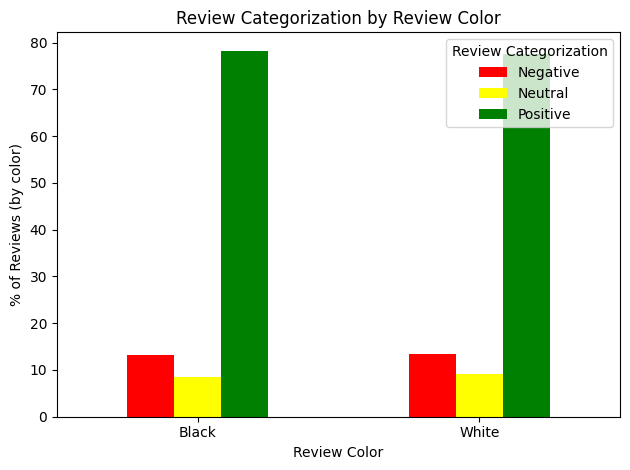

In [9]:
grouped = (
    df.groupby(['Review Color', 'Review_Categorization'])
      .size()
      .unstack(fill_value=0)
)

percentages = grouped.div(grouped.sum(axis=1), axis=0) * 100
percentages.plot(kind='bar', color=['red', 'yellow', 'green'])

plt.xlabel('Review Color')
plt.ylabel('% of Reviews (by color)')
plt.title('Review Categorization by Review Color')
plt.xticks(rotation=0)
plt.legend(title='Review Categorization')

plt.tight_layout()
plt.show()

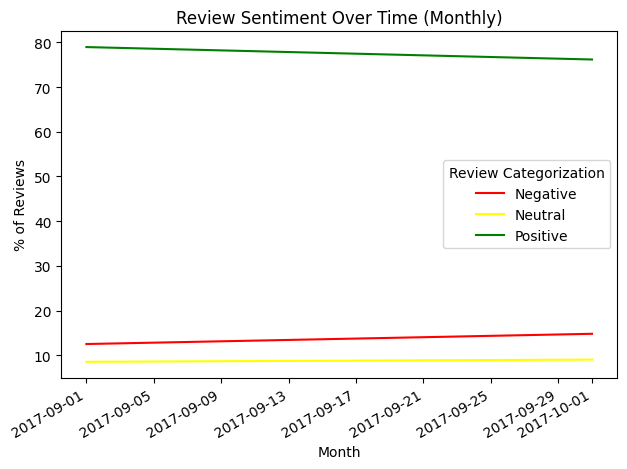

In [10]:
monthly_counts = (
    df.groupby(['Month', 'Review_Categorization'])
      .size()
      .unstack(fill_value=0)
)
monthly_percentages = monthly_counts.div(
    monthly_counts.sum(axis=1), axis=0
) * 100


monthly_percentages.plot(color=['red', 'yellow', 'green'])

plt.xlabel('Month')
plt.ylabel('% of Reviews')
plt.title('Review Sentiment Over Time (Monthly)')
plt.legend(title='Review Categorization')

plt.tight_layout()
plt.show()

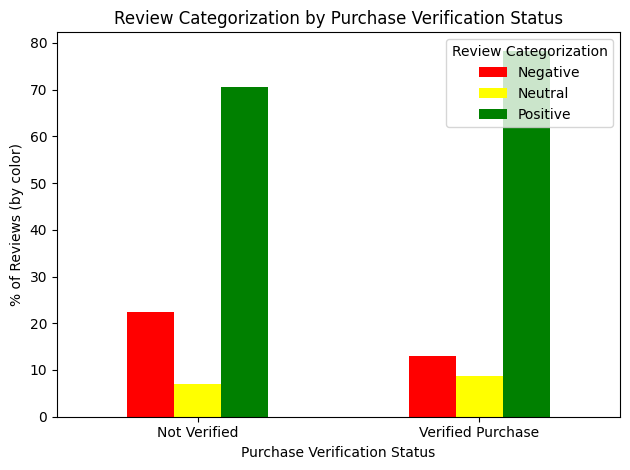

In [11]:
grouped = (
    df.groupby(['User Verified', 'Review_Categorization'])
      .size()
      .unstack(fill_value=0)
)

percentages = grouped.div(grouped.sum(axis=1), axis=0) * 100
percentages.plot(kind='bar', color=['red', 'yellow', 'green'])

plt.xlabel('Purchase Verification Status')
plt.ylabel('% of Reviews (by color)')
plt.title('Review Categorization by Purchase Verification Status')
plt.xticks(rotation=0)
plt.legend(title='Review Categorization')

plt.tight_layout()
plt.show()

### Insights

1. No difference in percentage of Positive/Negative/Neutral reviews by product color
2. Review sentiment over time are overall stable, however we do see positive reviews drop slightly in favor of negative
3. About 25% percent of unverified purchase reviews are negative, 15% in verified purchases 

### VoC analysis based on reviews

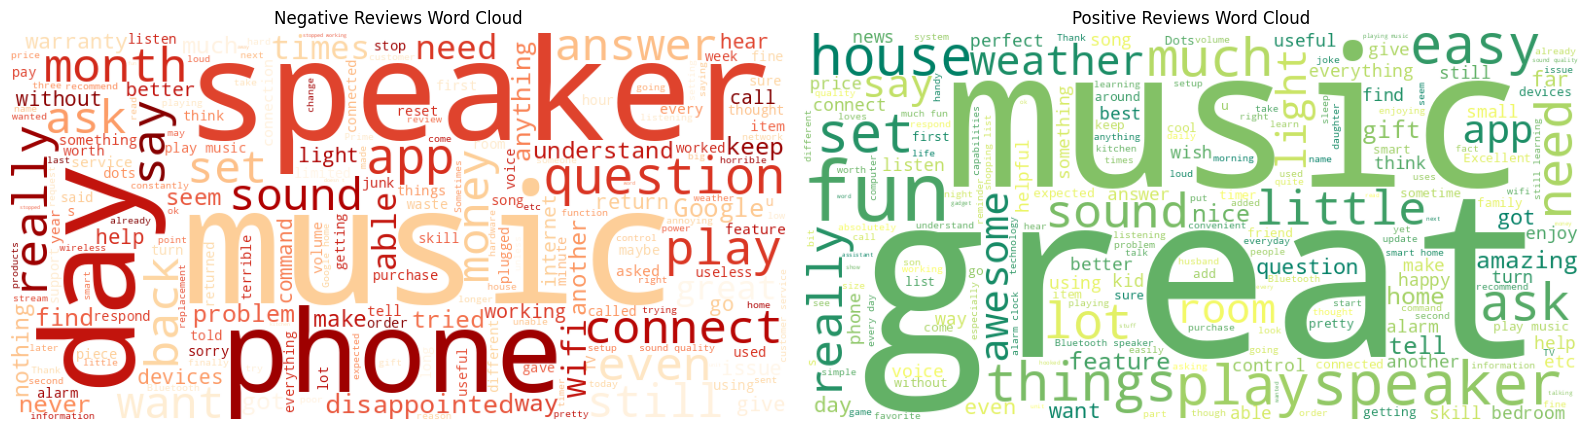

In [12]:
# Separate text by sentiment
negative_text = ' '.join(
    df[df['Review_Categorization'] == 'Negative']['Review Text']
)

positive_text = ' '.join(
    df[df['Review_Categorization'] == 'Positive']['Review Text']
)

stopwords=set(STOPWORDS)
stopwords.update(['Alexa', 'Amazon','dot', 'star','stars','one', 'five','Echo', 'device', 'use', 'work', 'will', 'two', 'four', 'product', 'thing', 'works', 'know', 'now', 'buy', 'many', 'less', 'new', 'always', 'bought','good', 'purchased', 'well', 'love', 'time'])

# Create word clouds
negative_wc = WordCloud(
    width=800,
    height=400,
    background_color='white',
    stopwords=stopwords,
    colormap='OrRd'
).generate(negative_text)

positive_wc = WordCloud(
    width=800,
    height=400,
    background_color='white',
    stopwords=stopwords,
    colormap='summer'
).generate(positive_text)

# Plot
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
plt.imshow(negative_wc)
plt.axis('off')
plt.title('Negative Reviews Word Cloud')

plt.subplot(1, 2, 2)
plt.imshow(positive_wc)
plt.axis('off')
plt.title('Positive Reviews Word Cloud')

plt.tight_layout()
plt.show()

As many words are the same in both word clouds, let's explore the usage of common words in both groups

### Common Word 1: Music

In [13]:
import re

def extract_music_sentences(text, window=5):
    words = re.findall(r'\w+', str(text))
    contexts = []

    for i, word in enumerate(words):
        if word.lower() == 'music':
            start = max(i - window, 0)
            end = min(i + window + 1, len(words))
            contexts.append(' '.join(words[start:end]))

    return contexts

negative_music_sentences = (
    df[df['Review_Categorization'] == 'Negative']['Review Text']
    .apply(extract_music_sentences)
    .explode()
    .dropna()
)

positive_music_sentences = (
    df[df['Review_Categorization'] == 'Positive']['Review Text']
    .apply(extract_music_sentences)
    .explode()
    .dropna()
)

In [14]:
negative_music_sentences.head(20)


74     much for asking for morning music when waking ...
85        So I just use with music in my Amazon music or
85        with music in my Amazon music or radio station
86     got this was to have music in the restroom whi...
121    is worthless To listen to music you must pay t...
142                   I cannot seem to get music to play
175                 it worked with Google Play Music smh
204    was expected The information and music playing...
204    one to buy the Amazon Music Packages rather th...
204    than a specific genre of music these aren t an...
205       to be able to play music on each echo device I
205    device I already had amazon music for my echo ...
205                to be able to play music in each echo
208    things like set timers play music answer simpl...
208       let s listen to some music and I m telling you
208    it will actually turn the music on Sometimes i...
208    it will literally turn the music on 45 minutes...
208    Sometimes it will stop t

In [15]:
positive_music_sentences.head(20)


6      when asked to play Spanish music and after a w...
7      advertised Not using it for music I have it in...
9      had lying around and the music quality is real...
9      makes a huge difference in music sound quality...
9      to listen for free to music that you already o...
9      drive collection to your Amazon Music library ...
13     She s great for playing music also The Dot see...
27     you type Plays my Pandora music constantly get...
39     family We love listening to music playing game...
42     gadget to have around for music setting a cook...
69     have an assistant Love the music and the cute ...
91                        news weather and to play music
99     great with playing my amazon music which is wh...
111    just wish it could play music a little louder ...
111    could play the same amazon music through both ...
158                       and I enjoy listening to music
169    bedroom as an alarm clock music soothing sound...
188    product Speaker is lacki

### Common Word 2: Speaker

In [16]:
def extract_speaker_sentences(text, window=8):
    words = re.findall(r'\w+', str(text))
    contexts = []

    for i, word in enumerate(words):
        if word.lower() == 'speaker':
            start = max(i - window, 0)
            end = min(i + window + 1, len(words))
            contexts.append(' '.join(words[start:end]))

    return contexts

negative_speaker_sentences = (
    df[df['Review_Categorization'] == 'Negative']['Review Text']
    .apply(extract_speaker_sentences)
    .explode()
    .dropna()
)

positive_speaker_sentences = (
    df[df['Review_Categorization'] == 'Positive']['Review Text']
    .apply(extract_speaker_sentences)
    .explode()
    .dropna()
)

In [17]:
negative_speaker_sentences.head(20)

74      PLAY by Bang Olufsen Beoplay S3 Home Bluetooth...
74      accompany the dot and it is an amazing speaker...
86      music in the restroom while I shower The speak...
166     home and hasn t been used since the speaker wo...
180     very disappointed the speaker is too low no sound
205     Amazon solution is to connect or pair a speake...
205     speaker to it well i dont have a speaker that ...
213                                       Speaker is weak
224     Too much work I involved on users part Speaker...
270     This makes the devices nearly useless now The ...
311     just listen to music on I have a speaker for t...
416                  Speaker is not good and I don t like
607     I ordered the echo with the speaker and didn t...
607     with the speaker and didn t get the speaker I ...
704     not as bad as the Echo tower The speaker quali...
813     had this less then 6 months and the speaker ha...
1025    It lasted less than 9 months and the speaker c...
1321    near a

In [18]:
positive_speaker_sentences.head(20)

9      sound quality since the Dot has a small speake...
41     Yes you can hook it up to a speaker but then w...
49     Echo Dot I supplemented it with a Vaux speaker...
167         this small one is as great minus the speaker
188    Great product Speaker is lacking for music but...
227    good as the bigger ones but an external speake...
239    have known it would auto sync to my speaker ba...
263    the only places Google Home comes out ahead Sp...
265    Echo s These work better with a three speaker ...
266    For the size the speaker is quite loud So far ...
312    across the room Not a super great loud speaker...
312    purchase this version of the echo for the spea...
312    It s definitely louder than your average phone...
405    purchase I listen to music recommend a bluetoo...
411    Great little device It syncs with my Bluetooth...
417    full size does not but it is enough speaker fo...
442           Nice device speaker could be louder though
456    the household Have it pa

### Common Word 3: Connect

In [19]:
def extract_connect_sentences(text, window=8):
    words = re.findall(r'\w+', str(text))
    contexts = []

    for i, word in enumerate(words):
        if word.lower() == 'connect':
            start = max(i - window, 0)
            end = min(i + window + 1, len(words))
            contexts.append(' '.join(words[start:end]))

    return contexts

negative_connect_sentences = (
    df[df['Review_Categorization'] == 'Negative']['Review Text']
    .apply(extract_connect_sentences)
    .explode()
    .dropna()
)

positive_connect_sentences = (
    df[df['Review_Categorization'] == 'Positive']['Review Text']
    .apply(extract_connect_sentences)
    .explode()
    .dropna()
)


In [20]:
negative_connect_sentences.head(20)

109     It took forever to connect to wifi and then sh...
109     disconnect randomlyWhen I kept trying to reset...
160     t answer hardly any questions at all cannot co...
205     you cant hear nothing Amazon solution is to co...
209     does not have directions as stated could not c...
311     has different skills that you are able to conn...
412     in an apartment complex beware Your neighbors ...
420     cannot figure out how to set Alexa to connect ...
455                  you didn t ask And now can t connect
486     Amazon Prime already and when I tried to conne...
496     with wi fi connectivity which I use to connect...
496     device requires Smart Phone Tablet or Laptop t...
704     from the Echo Dot Now neither one will connect...
733     to boot back up Also does not always connect t...
750     couldn t get it to connect and tried numerous ...
1086    to operate I do like how it can connect to my ...
1195    in the same spot The dots can t connect often ...
1400    s last

In [21]:
positive_connect_sentences.head(20)

227     like the idea of people being able to connect ...
269     sounds better you can also ask her to connect ...
358     this setup very easy and was able to connect m...
365     We love the echo dot Easy to connect to your w...
391     Love it Easy to setup Wished it could connect ...
417     connected I like the puck because it will conn...
706     wifi That is the ONLY way you can connect to y...
706     to YOUR amazon account I just tried to connect...
706     tablet with no success Then I tried to connect...
814     the TV sits right under it Anyway to connect i...
875     Dot has bluetooth and a headphone jack to conn...
875     external speaker I didn t even have to connect...
904     Dot is in use daily I blue tooth connect it to...
1354    would expect from a small device It does conne...
1384    that s a game changer Plus you can connect to ...
1441      Works greatA little haRd to connect to calender
1486    Spotify premium or a amazon prime account to c...
1527    works 

The reasons why the words repeat in both sentiments are now clearer:
1. Negative reviewers were disppointed about having to have a subscription to Amazon Music, positive reviewers didn't mind as much or did not use it for music
2. Negative reviewers and positive reviewers agree that speakers could be louder
3. Negative reviewers struggled to connect the device to their wifi or their Amazon account, positive reviewers did not encounter this issue